# Bias–Variance Overview

This notebook provides an empirical overview of the bias–variance framework
using controlled synthetic data.

The goal is not to achieve optimal performance, but to observe how model
complexity affects training error, validation error, and generalization behavior.

## Scope

- Controlled synthetic dataset
- Systematic increase of model complexity
- Fixed data-generating process
- Diagnostics via training and validation error

## Out of scope

- Hyperparameter tuning
- Cross-validation
- Regularization effects (introduced in the next notebook)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.style.use("default")

In [9]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## Data-generating process

The target is generated from a non-linear function with additive noise.
This controlled setup allows observation of underfitting and overfitting
as model complexity increases.

In [10]:
n_samples = 200

X = np.linspace(0, 10, n_samples).reshape(-1, 1)
noise = np.random.normal(0.0, 1.0, size=n_samples)

y = (
    0.5 * X.squeeze() ** 2
    + 1.0 * X.squeeze()
    + 5.0
    + noise
)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE
)

## Model complexity sweep

Model complexity is increased via polynomial feature expansion.
Training and validation error are tracked as complexity grows,
while keeping the data-generating process fixed.

In [12]:
degrees = range(1, 11)

train_errors = []
val_errors = []

In [13]:
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

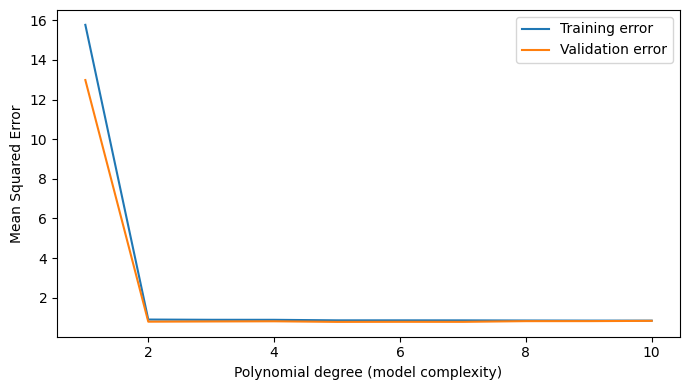

In [14]:
plt.figure(figsize=(7, 4))
plt.plot(degrees, train_errors, label="Training error")
plt.plot(degrees, val_errors, label="Validation error")
plt.xlabel("Polynomial degree (model complexity)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.tight_layout()
plt.show()

## Interpretation

Low-degree models exhibit high training and validation error,
indicating a bias-dominated (underfitting) regime.

As model complexity increases, training error decreases steadily,
while validation error initially decreases and then increases.

The divergence between training and validation error at higher degrees
indicates a variance-dominated (overfitting) regime.

## Takeaway

Bias and variance manifest empirically through the relationship
between training error, validation error, and model complexity.

Improving training performance alone is insufficient and can
actively harm generalization as model complexity increases.

The bias–variance framework provides a practical lens to
diagnose underfitting and overfitting before introducing
regularization or more complex models.